<a href="https://colab.research.google.com/github/xuxiufeng/Blockchain_Simulation_Multiple_Hackers_with_Resetting_Times/blob/main/Gamma-Gamma-Gamma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import numpy as np
import matplotlib.pyplot as plt

In [41]:
np.random.seed(3)

In [42]:
k = 4

Generate $\eta_j$ and $\delta_j$, where $j=1,2,3,4$.

In [43]:
eta_list = np.random.uniform(1/3,1/2,k)
delta_list = np.random.uniform(1,2,k)
eta_list, delta_list

(array([0.42513298, 0.45135797, 0.38181746, 0.41847127]),
 array([1.89294695, 1.89629309, 1.12558531, 1.20724288]))

For $X\sim Gamma(\eta_j, \delta_j)$, we have
\begin{eqnarray*}
f(x)=\frac{\delta_j^{\eta_j}}{\Gamma(\eta_j)}x^{\eta_j-1}e^{-\delta_j x}
\end{eqnarray*}

In [44]:
def ET_m(m, eta_list, delta_list, alpha, beta, theta, tau):
    def Generate_Z(m, eta_list, delta_list):
        sum_of_x_list = []
        for i in range(len(eta_list)):
            sum_of_x_list.append(np.sum(np.random.gamma(eta_list[i], 1/delta_list[i], m)))
        Z = min(sum_of_x_list)
        return Z
    def T_m(m, eta_list, delta_list, alpha, beta, theta, tau):
        sum_of_time = 0
        sum_of_w = 0
        y = np.random.gamma(alpha, 1/beta)
        w = np.random.gamma(theta, 1/tau)
        Z_m = Generate_Z(m, eta_list, delta_list)
        while Z_m > y:
            sum_of_time = sum_of_time + y + w
            sum_of_w += w
            Z_m = Generate_Z(m, eta_list, delta_list)
            y = np.random.gamma(alpha, 1/beta)
            w = np.random.gamma(theta, 1/tau)
        return sum_of_time + Z_m, sum_of_w

    ET = np.repeat(np.nan, m)
    sum_w = np.repeat(np.nan, m)
    for i in range(m):
        T_0 = 0
        W_0 = 0
        iter = 30000 # iter 30000
        for j in range(iter):
            T_0 += T_m(i+1, eta_list, delta_list, alpha, beta, theta, tau)[0]
            W_0 += T_m(i+1, eta_list, delta_list, alpha, beta, theta, tau)[1]
        ET[i] = T_0/iter
        sum_w[i] = W_0/iter
        print(ET[i])
    return ET, sum_w

0.3111143750481546
0.8437783863084036
1.4994502269650112
2.239172655931961
3.064354794684745
4.018512353143194
5.098809700219652
6.4571272426066315
7.803169862971818
9.461776390636523
11.215959991610735
13.145166746552732
15.560444435972652
18.461730974532273
21.332874805786926
24.682900395151368
28.530857559890276
33.16337174559738
37.613458260344245
43.25747649899719
49.75556990472811
56.22360855666118
64.35639161896081
73.09326085275328
83.43784419858288
94.1501958220201
107.1227881809493
120.43853644614761
136.23543284214833
153.6430280110138
174.20425836266458
196.43268310172041
219.49673450366674
250.64372994256937
280.402078925692
316.0498157873396
353.850664508229
399.5803919872995
447.92583961985446
506.1047586733782


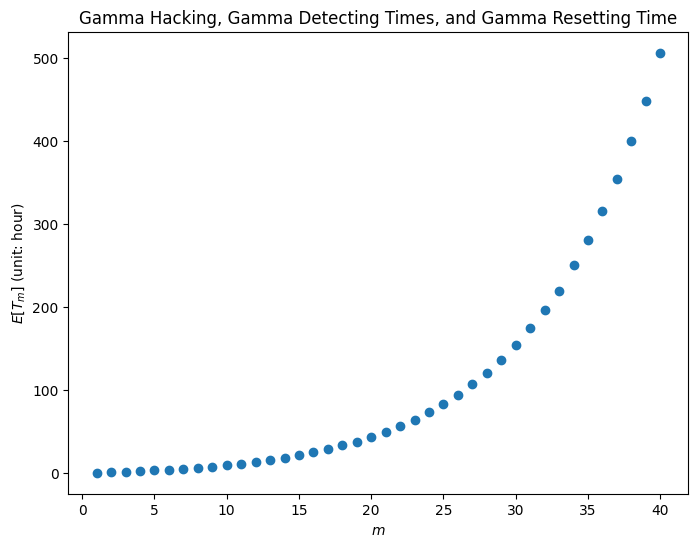

In [45]:
m = 40
alpha = 1/3
beta = 1/2
theta = 1/4
tau = 1/5
ET_m, sum_w = ET_m(m, eta_list, delta_list, alpha, beta, theta, tau)
fig = plt.figure(figsize=(8, 6))
plt.scatter(range(1, m+1), ET_m)
plt.xlabel(r'$m$')
plt.ylabel(r'$E[T_m]$ (unit: hour)')
plt.title('Gamma Hacking, Gamma Detecting Times, and Gamma Resetting Time')
plt.show()

In [46]:
R = [.6*c for c in range(1, m+1)]
C_2 = [.5*c for c in range(1, m+1)]
C_1 = [.2*c**.5  for c in range(1, m+1)]
E_mNR = np.repeat(np.nan, len(ET_m))
for j in range(m):
  E_mNR[j] = ((ET_m[j]-sum_w[j])*(R[j] - C_2[j]) - C_1[j]*sum_w[j])/ET_m[j]
m_max = np.where(E_mNR == max(E_mNR))[0][0] + 1
print(m_max, max(E_mNR))
E_mNR

40 0.5706338094232793


array([-0.17881869, -0.23089905, -0.22377102, -0.23244155, -0.23653132,
       -0.22192148, -0.19586792, -0.16816273, -0.16739934, -0.13555809,
       -0.11989801, -0.1475167 , -0.09667314, -0.05528125, -0.05713602,
       -0.03598393,  0.00813522,  0.03542317,  0.03401133,  0.07521125,
        0.10269595,  0.11733209,  0.14525726,  0.16904607,  0.18749374,
        0.21616667,  0.25157282,  0.24975358,  0.28513057,  0.30017714,
        0.32847365,  0.36077504,  0.38579218,  0.41273653,  0.4309667 ,
        0.50062   ,  0.44000475,  0.50348113,  0.53962852,  0.57063381])

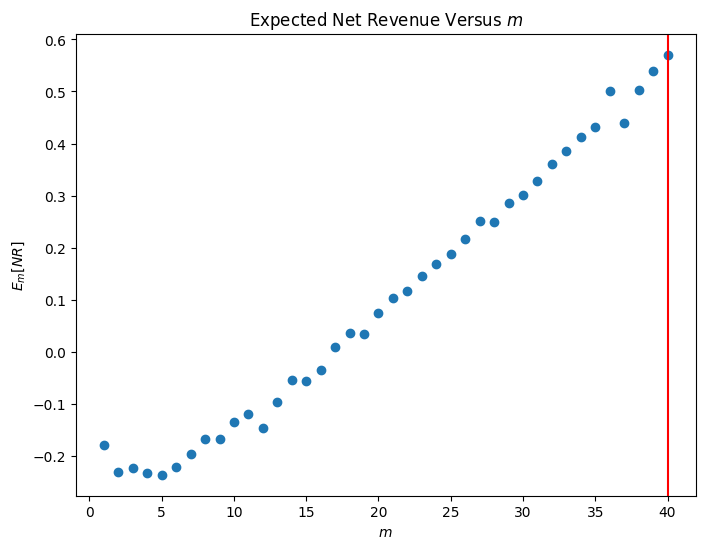

In [47]:
fig = plt.figure(figsize=(8, 6))
plt.scatter(range(1, m+1), E_mNR)
plt.axvline(x = m_max, c='red')
plt.xlabel(r'$m$')
plt.ylabel(r'$E_m[NR]$')
plt.title(r'Expected Net Revenue Versus $m$')
plt.show()